# everywhereml.data.preprocessing.CrossDiff

`CrossDiff` appends to the input new features computed as the difference between the input features. Given an input in the form `x0, x1, x2`, the output will be `x0, x1, x2, x0 - x1, x1 - x2`.

In [1]:
import sys
sys.path.append('../../../')

from everywhereml.data.preprocessing import CrossDiff
from everywhereml.data.plot import scatter
from sklearn.datasets import load_iris

Number of input features 4


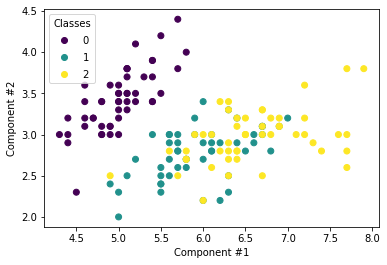

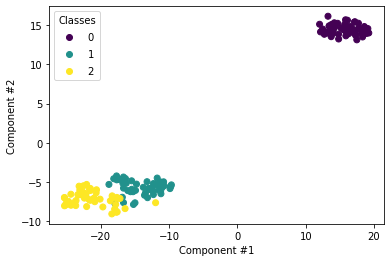

In [2]:
"""
Load Iris
"""
X, y = load_iris(return_X_y=True)

print('Number of input features', X.shape[1])

scatter(X, hue=y)
scatter(X, hue=y, tsne=2)

Number of output features 10


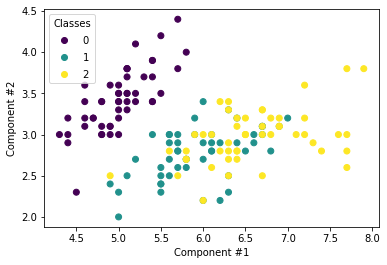

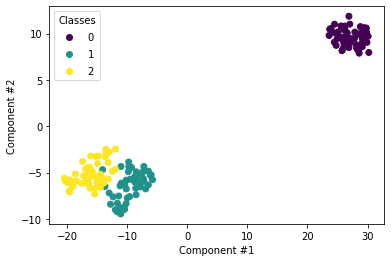

In [3]:
"""
Xt will contain the cross diff features in addition to the input ones
"""
Xt, yt = CrossDiff().fit_transform(X, y)

print('Number of output features', Xt.shape[1])

scatter(Xt, hue=yt)
scatter(Xt, hue=yt, tsne=2)

In [4]:
"""
Port to C++
"""
print(CrossDiff().fit(X, y).port(language='cpp'))

#ifndef UUID5069132352
#define UUID5069132352

namespace EverywhereML {
    namespace Data {
        namespace Preprocessing {
            
                class CrossDiff {
                    public:
                        

                        /**
                         * input_dim  = 4
                         * output_dim = 0
                         */
                        bool transform(float *source) {
                            
    uint16_t featureIdx = 0;

    for (uint16_t i = 0; i < 3; i++) {
        for (uint16_t j = i + 1; j < 4; j++) {
            source[4 + (featureIdx++)] = source[i] - source[j];
        }
    }

    return true;



                            return true;
                        }

                        

                    protected:
                        

                        
                };
            
        }
    }
}

#endif


In [5]:
"""
Port to JS
"""
print(CrossDiff().fit(X, y).port(language='js'))

function CrossDiff() {
    

    /**
     * input_dim  = 4
     * output_dim = 0
     * @return Array|false
     */
    this.transform = function(source) {
        var $this = this;

        
    var diffs = [];

    for (var i = 0; i < 3; i++) {
        for (var j = i + 1; j < 4; j++) {
            diffs.push(source[i] - source[j]);
        }
    }

    return source.concat(diffs);


    }
};


In [6]:
"""
Port to PHP
"""
print(CrossDiff().fit(X, y).port(language='php'))

<?php


class CrossDiff {
    

    /**
     * Constructor
     */
    public function __construct() {
        
    }

    /**
     * input_dim  = 4
     * output_dim = 0
     * @return array|false
     */
    public function transform(array $source) {
        
    $diffs = [];

    for ($i = 0; $i < 3; $i++) {
        for ($j = $i + 1; $j < 4; $j++) {
            array_push($diffs, $source[i] - $source[j]);
        }
    }

    return array_merge($source, $diffs);


    }

    
};
